### Modeling for insurance Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

from sklearn.metrics import f1_score, auc, precision_score, recall_score, make_scorer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
inpatient_data = pd.read_pickle('../../data/feature engineered/inpatient.pkl')
outpatient_data = pd.read_pickle('../../data/feature engineered/outpatient.pkl')

In [3]:
inpatient_data.shape, outpatient_data.shape

((40474, 49), (517737, 47))

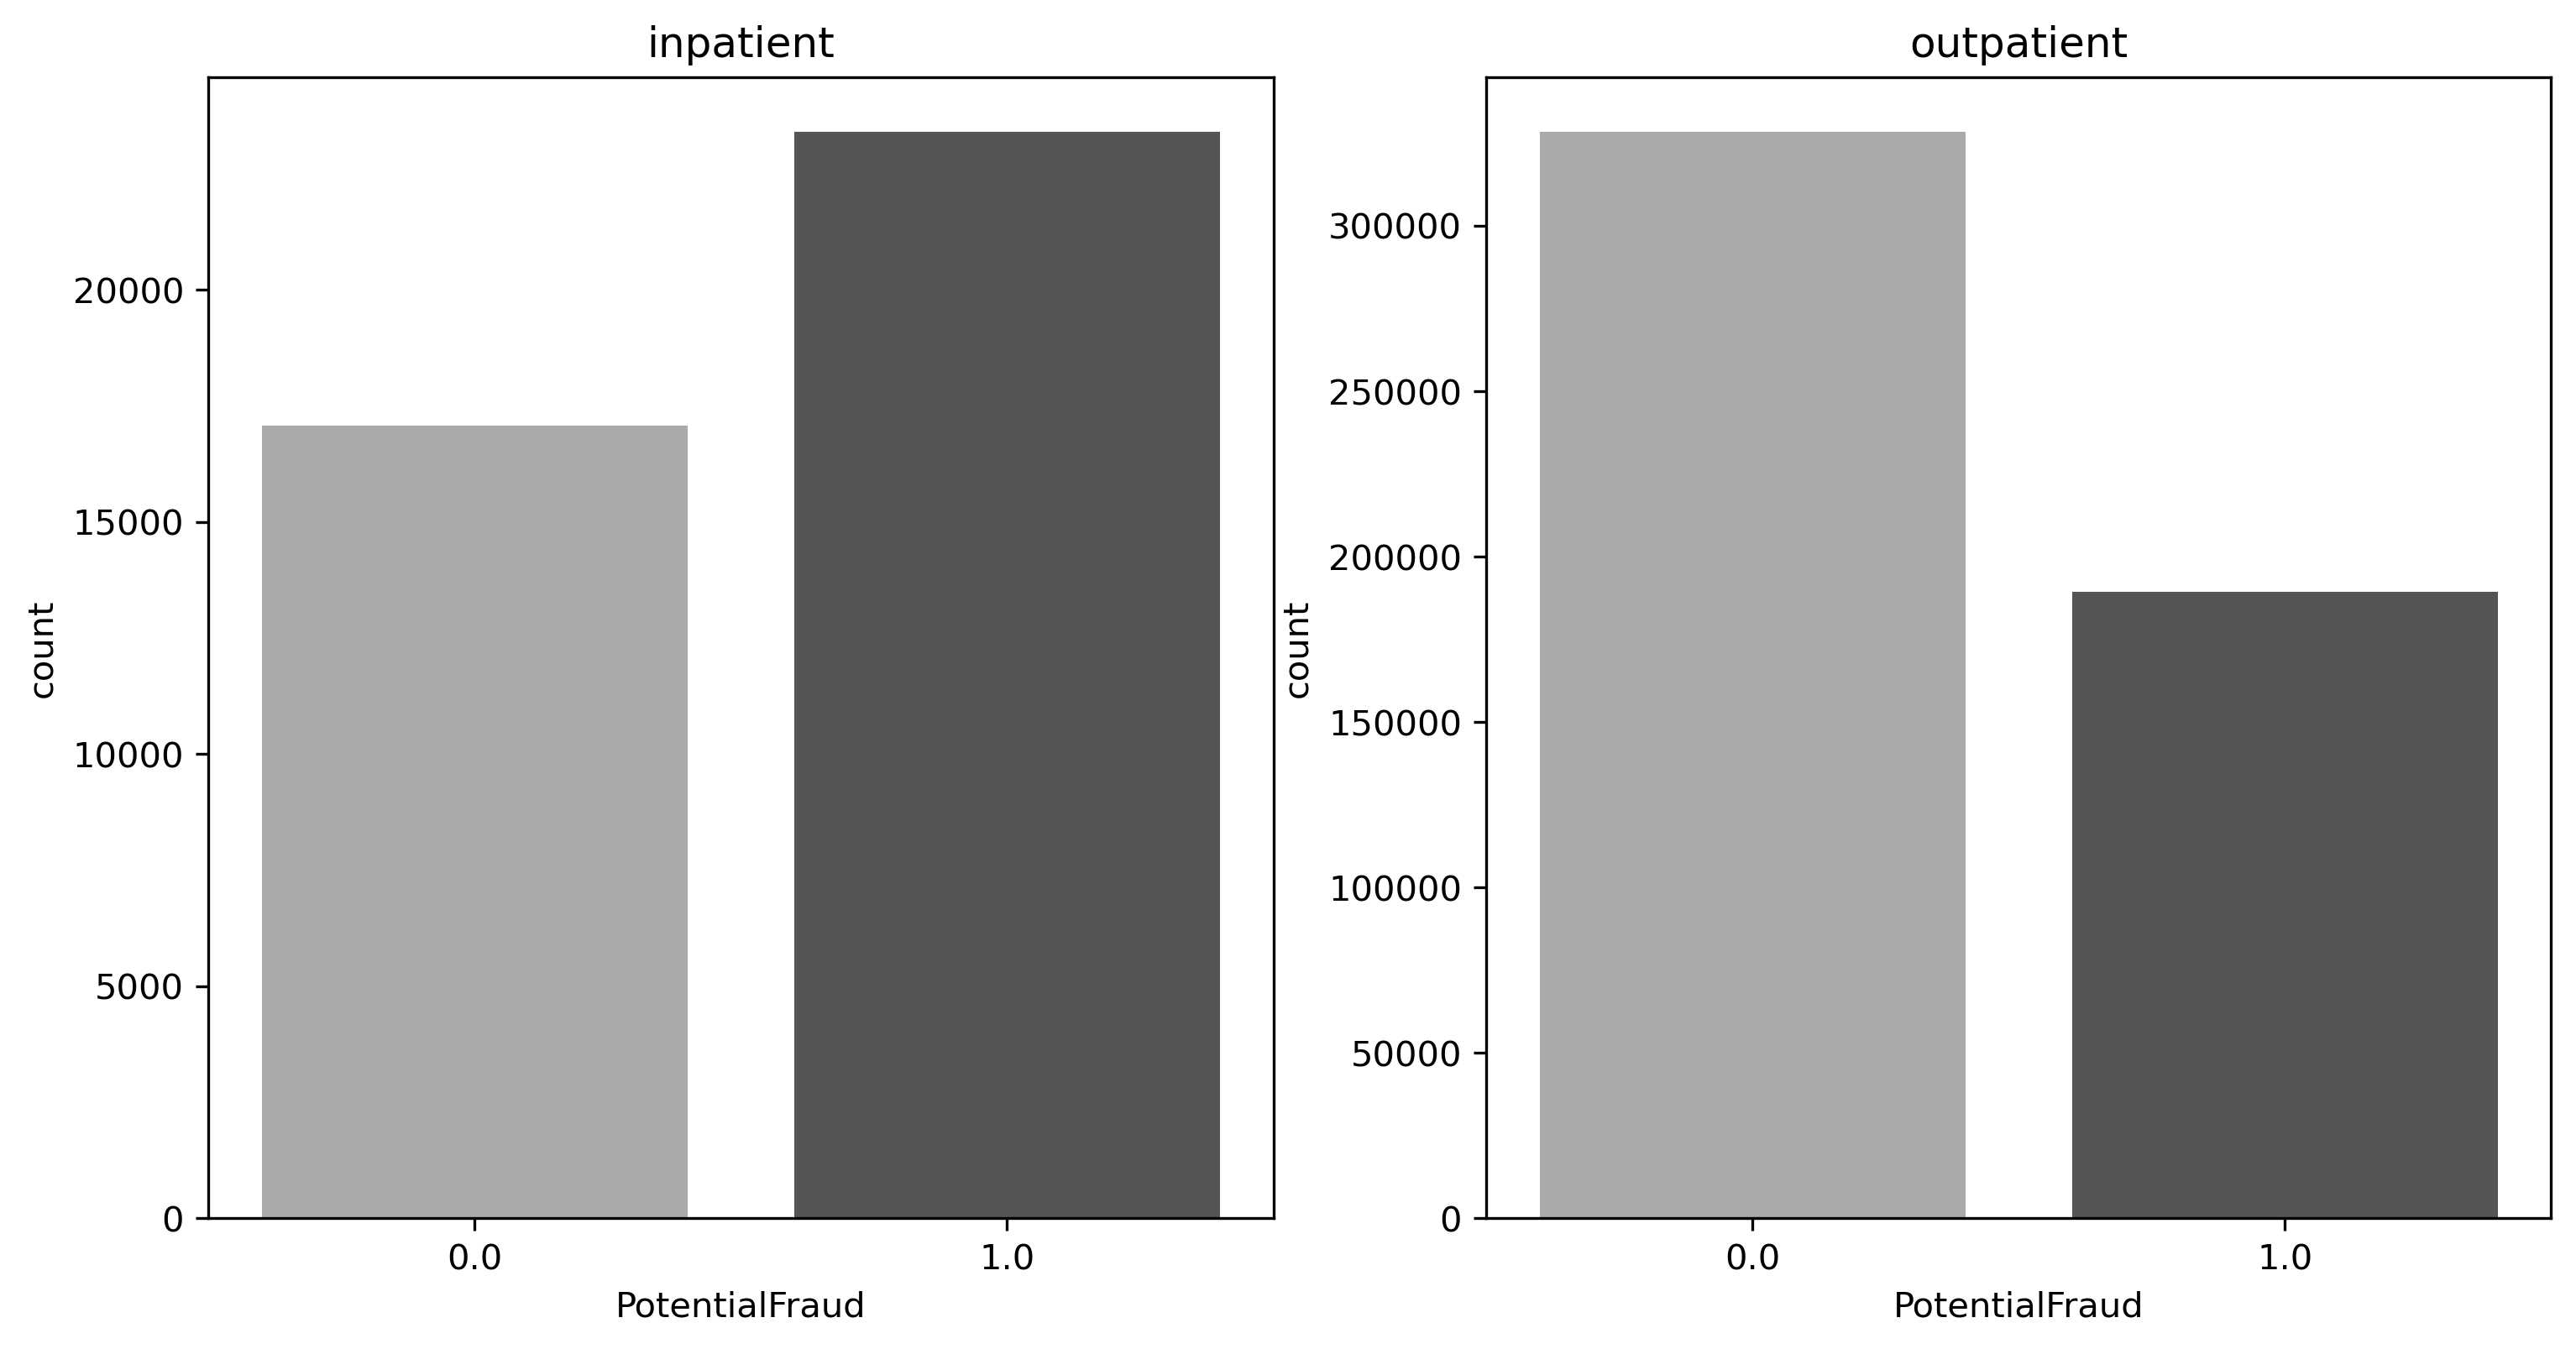

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 6], dpi=300)
sns.countplot(x=inpatient_data['PotentialFraud'], ax=axes[0], palette='binary')
axes[0].set_title('inpatient')
sns.countplot(x=outpatient_data['PotentialFraud'], ax=axes[1], palette='binary')
axes[1].set_title('outpatient')
plt.show()

****Inpatient****

In [4]:
train, test = train_test_split(inpatient_data, test_size=0.2)
train.shape, test.shape

((32379, 49), (8095, 49))

In [5]:
Y = train['PotentialFraud']
X = train.drop('PotentialFraud', axis=1)

In [6]:
cv = RepeatedKFold(n_splits=4, n_repeats=8, random_state=1)

### model one

In [7]:
feature_pipeline = Pipeline(steps=[('feat_selection', SelectKBest(score_func=mutual_info_classif, k=10))])
model_1 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', LogisticRegression(max_iter=1000, penalty='l2', solver='saga'))])
model_1.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', LogisticRegression(max_iter=1000, solver='saga'))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': LogisticRegression(max_iter=1000, solver='saga'),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__C

In [13]:
grid = {'model__class_weight': [{0: 1, 1: w} for w in np.linspace(1, 10, 20)]}

model_1_gs = GridSearchCV(estimator=model_1, cv=cv, n_jobs=-1,
                          param_grid=grid,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True,
                          )
model_1_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=12, n_splits=6, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [{0: 1, 1: 1.0},
                                                 {0: 1, 1: 1.473...
                                                 {0: 1, 1: 6.2105263157894735},
                                                 {0: 1, 1: 6.684210526315789},
                                                 {0: 1, 1: 7.157894736842105},
                                                 {0: 1, 1: 7.631

In [18]:
model_1_cv = pd.DataFrame(model_1_gs.cv_results_)
model_1_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split64_train_f1,split65_train_f1,split66_train_f1,split67_train_f1,split68_train_f1,split69_train_f1,split70_train_f1,split71_train_f1,mean_train_f1,std_train_f1
0,18.197283,1.716909,0.023824,0.008864,"{0: 1, 1: 1.0}","{'model__class_weight': {0: 1, 1: 1.0}}",0.815208,0.817633,0.819680,0.811547,...,0.678956,0.676325,0.678471,0.678041,0.681243,0.680000,0.677138,0.679449,0.678933,0.001713
1,19.085700,0.408710,0.023531,0.008236,"{0: 1, 1: 1.4736842105263157}","{'model__class_weight': {0: 1, 1: 1.4736842105...",0.653923,0.651576,0.647482,0.644089,...,0.735558,0.735102,0.732658,0.732594,0.736233,0.734648,0.734576,0.733945,0.734228,0.001733
2,20.439193,1.063631,0.024027,0.008745,"{0: 1, 1: 1.9473684210526314}","{'model__class_weight': {0: 1, 1: 1.9473684210...",0.582816,0.576134,0.575278,0.573180,...,0.734166,0.733576,0.731809,0.734426,0.734241,0.731146,0.732028,0.731004,0.732528,0.001030
3,18.951122,0.340350,0.025281,0.011367,"{0: 1, 1: 2.4210526315789473}","{'model__class_weight': {0: 1, 1: 2.4210526315...",0.581244,0.571216,0.573850,0.570340,...,0.733889,0.733015,0.731653,0.733669,0.734146,0.731214,0.731677,0.731100,0.732250,0.001014
4,19.289672,0.591806,0.021408,0.007920,"{0: 1, 1: 2.894736842105263}","{'model__class_weight': {0: 1, 1: 2.8947368421...",0.581542,0.571058,0.573202,0.570052,...,0.734321,0.733341,0.732198,0.734178,0.734492,0.731376,0.731998,0.731286,0.732603,0.001018
5,18.986841,0.270130,0.023485,0.011245,"{0: 1, 1: 3.3684210526315788}","{'model__class_weight': {0: 1, 1: 3.3684210526...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
6,19.068139,0.448697,0.024729,0.008978,"{0: 1, 1: 3.8421052631578947}","{'model__class_weight': {0: 1, 1: 3.8421052631...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
7,19.315148,1.680803,0.023155,0.008008,"{0: 1, 1: 4.315789473684211}","{'model__class_weight': {0: 1, 1: 4.3157894736...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
8,19.656072,2.926613,0.022469,0.008919,"{0: 1, 1: 4.789473684210526}","{'model__class_weight': {0: 1, 1: 4.7894736842...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019
9,19.719491,3.001547,0.023030,0.008496,"{0: 1, 1: 5.263157894736842}","{'model__class_weight': {0: 1, 1: 5.2631578947...",0.581619,0.571058,0.573096,0.570052,...,0.734321,0.733341,0.732198,0.734161,0.734517,0.731495,0.732061,0.731286,0.732620,0.001019


In [23]:
model_1_cv.to_pickle('../../data/temp/model_1.pkl')

In [20]:
model_1_gs.best_score_, model_1_gs.best_estimator_

(0.7337678151144008,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000001D642189E18>))])),
                 ('model',
                  LogisticRegression(class_weight={0: 1, 1: 1.4736842105263157},
                                     max_iter=1000, solver='saga'))]))

In [99]:
model_cv_score = pd.read_pickle('../../data/temp/model_1.pkl')
test_precision = model_cv_score.loc[:, ['mean_test_precision', 'std_test_precision']]
train_precision = model_cv_score.loc[:, ['mean_train_precision', 'std_train_precision']]
test_recall = model_cv_score.loc[:, ['mean_test_recall', 'std_test_recall']]
train_recall = model_cv_score.loc[:, ['mean_train_recall', 'std_train_recall']]
test_f1 = model_cv_score.loc[:, ['mean_test_f1', 'std_test_f1']]
train_f1 = model_cv_score.loc[:, ['mean_train_f1', 'std_train_f1']]

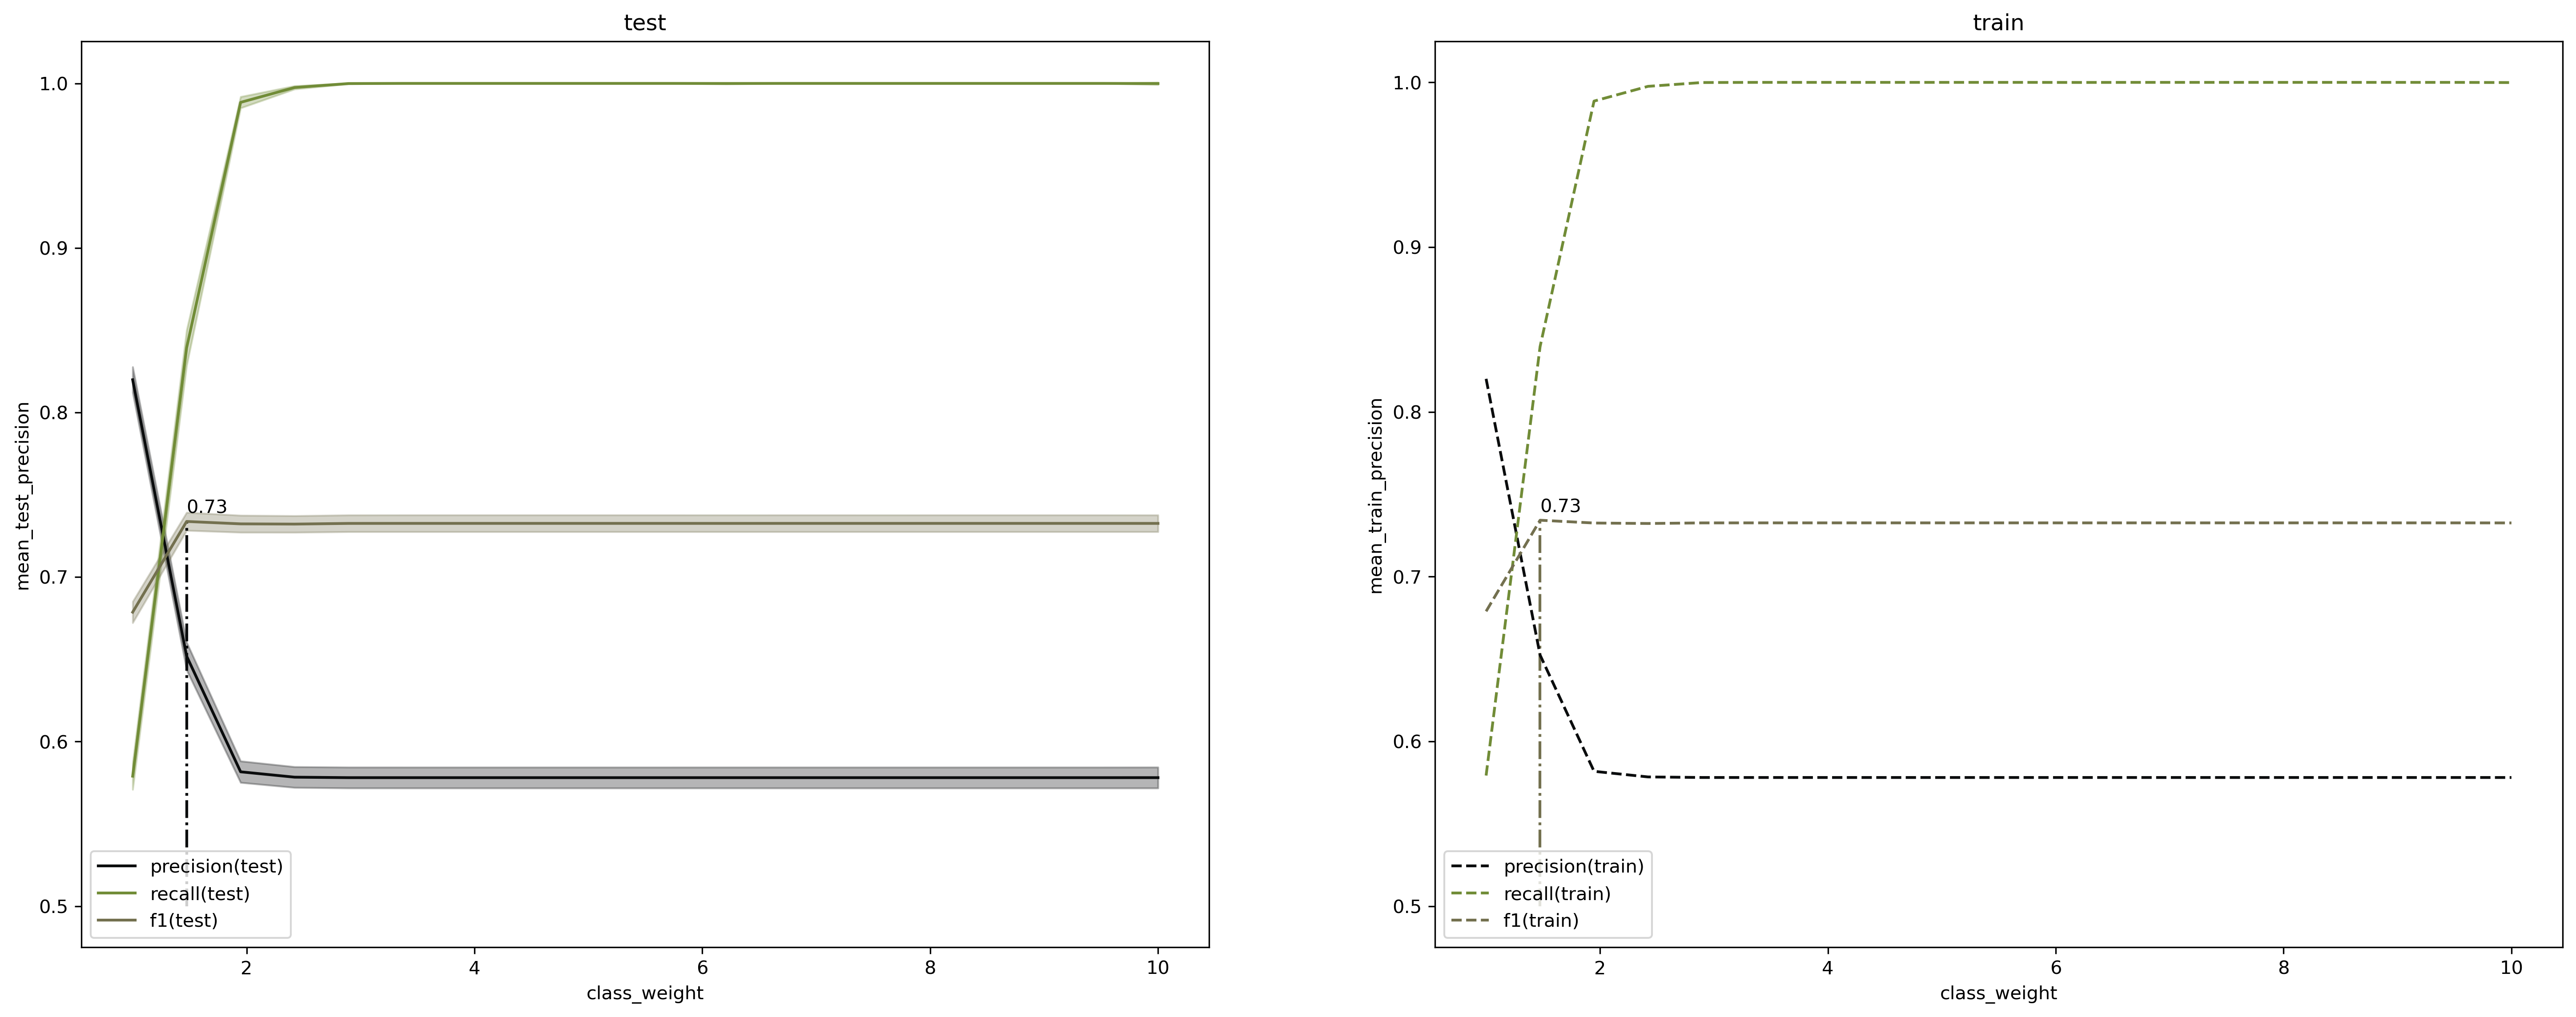

In [100]:
x_axis = np.linspace(1, 10, 20)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 9], dpi=300)

ax_0 = sns.lineplot(x=x_axis, y=test_precision['mean_test_precision'],
                    color='#0A0C0D', ax=axes[0], label='precision(test)')
ax_1 = sns.lineplot(x=x_axis, y=test_recall['mean_test_recall'],
                    color='#718C37', ax=axes[0], label='recall(test)')
ax_2 = sns.lineplot(x=x_axis, y=test_f1['mean_test_f1'],
                    color='#73704F', ax=axes[0], label='f1(test)')
ax_3 = sns.lineplot(x=x_axis, y=train_precision['mean_train_precision'],
                    color='#0A0C0D', ax=axes[1], label='precision(train)')
ax_4 = sns.lineplot(x=x_axis, y=train_recall['mean_train_recall'],
                    color='#718C37', ax=axes[1], label='recall(train)')
ax_5 = sns.lineplot(x=x_axis, y=train_f1['mean_train_f1'],
                    color='#73704F', ax=axes[1], label='f1(train)')

axes[0].vlines(x=x_axis[test_f1.index[test_f1['mean_test_f1'] == test_f1['mean_test_f1'].max()][0]],
               ymin=0.5, ymax=test_f1['mean_test_f1'].max(),
               linestyle='-.', color='#0A0C0D')
axes[1].vlines(x=x_axis[train_f1.index[train_f1['mean_train_f1'] == train_f1['mean_train_f1'].max()][0]],
               ymin=0.5, ymax=train_f1['mean_train_f1'].max(),
               linestyle='-.', color='#73704F')

ax_0.fill_between(x_axis, test_precision['mean_test_precision'] - test_precision['std_test_precision'],
                  test_precision['mean_test_precision'] + test_precision['std_test_precision'],
                  alpha=0.3, color='#0A0C0D')
ax_1.fill_between(x_axis, test_recall['mean_test_recall'] - test_recall['std_test_recall'],
                  test_recall['mean_test_recall'] + test_recall['std_test_recall'],
                  alpha=0.3, color='#718C37')
ax_2.fill_between(x_axis, test_f1['mean_test_f1'] - test_f1['std_test_f1'],
                  test_f1['mean_test_f1'] + test_f1['std_test_f1'],
                  alpha=0.3, color='#73704F')

ax_3.lines[0].set_linestyle("--")
ax_4.lines[1].set_linestyle("--")
ax_5.lines[2].set_linestyle("--")

axes[0].set_xlabel('class_weight')
axes[0].annotate("%0.2f" % test_f1['mean_test_f1'].max(),
                 (x_axis[test_f1.index[test_f1['mean_test_f1'] == test_f1['mean_test_f1'].max()][0]],
                  test_f1['mean_test_f1'].max() + 0.005))
axes[0].set_title('test')
axes[1].set_xlabel('class_weight')
axes[1].annotate("%0.2f" % train_f1['mean_train_f1'].max(),
                 (x_axis[train_f1.index[train_f1['mean_train_f1'] == train_f1['mean_train_f1'].max()][0]],
                  train_f1['mean_train_f1'].max() + 0.005))
axes[1].set_title('train')
plt.legend()
plt.savefig('../../demo/Fraud Detection/compare splits scores.png')
plt.show()

### model two

In [8]:
model_2 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', SGDClassifier(max_iter=500))])
model_2.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', SGDClassifier(max_iter=500))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': SGDClassifier(max_iter=500),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__alpha': 0.0001,
 'model__average': False,
 

In [13]:
grid_2 = {'model__alpha': np.random.normal(0.1, 0.001, 10),
          'model__loss': ['log', 'perceptron'],
          }

model_2_gs = GridSearchCV(estimator=model_2, cv=cv, n_jobs=-1,
                          param_grid=grid_2,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_2_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x0000029388919E18>))])),
                                       ('model', SGDClassifier(max_iter=500))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.10118556, 0.09927619, 0.10072713, 0.10065515, 0.09964555,
       0.09978083, 0.09994515, 0.10048844, 0.10107196, 0.09963315]),
                         'model__loss': ['log', 'perceptron']},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [14]:
model_2_cv = pd.DataFrame(model_2_gs.cv_results_)
model_2_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__loss,params,split0_test_precision,split1_test_precision,split2_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,17.266848,0.515404,0.033685,0.009652,0.101186,log,"{'model__alpha': 0.10118555596661902, 'model__...",0.834423,0.834614,0.826737,...,0.675744,0.676139,0.676487,0.676831,0.677159,0.673413,0.678358,0.691201,0.676550,0.003097
1,16.254963,0.196355,0.032706,0.005999,0.101186,perceptron,"{'model__alpha': 0.10118555596661902, 'model__...",0.692613,0.662093,0.680765,...,0.541143,0.487487,0.678848,0.617766,0.700687,0.681421,0.684251,0.731656,0.663184,0.057108
2,16.405806,0.176464,0.031730,0.009945,0.099276,log,"{'model__alpha': 0.09927618889972195, 'model__...",0.835728,0.827097,0.829345,...,0.675504,0.676247,0.676572,0.677391,0.676218,0.674429,0.677678,0.675967,0.676246,0.001847
3,16.387744,0.230214,0.031730,0.006154,0.099276,perceptron,"{'model__alpha': 0.09927618889972195, 'model__...",0.708887,0.593756,0.571086,...,0.679752,0.623881,0.595498,0.682291,0.564374,0.714196,0.599237,0.702434,0.642448,0.059153
4,16.650864,0.438987,0.032707,0.007158,0.100727,log,"{'model__alpha': 0.10072713170975983, 'model__...",0.834163,0.836836,0.830964,...,0.675775,0.675868,0.675883,0.677204,0.676561,0.673133,0.679971,0.674705,0.676540,0.002608
5,16.559578,0.281697,0.031243,0.003906,0.100727,perceptron,"{'model__alpha': 0.10072713170975983, 'model__...",0.716189,0.634478,0.659151,...,0.673160,0.685720,0.598815,0.448820,0.594776,0.421955,0.633498,0.722592,0.643517,0.086488
6,16.477078,0.261913,0.034659,0.006457,0.100655,log,"{'model__alpha': 0.10065514874108548, 'model__...",0.834107,0.834972,0.826508,...,0.675893,0.675881,0.676479,0.675758,0.686255,0.672687,0.678678,0.674860,0.676733,0.003760
7,16.624015,0.251293,0.033684,0.006885,0.100655,perceptron,"{'model__alpha': 0.10065514874108548, 'model__...",0.634933,0.645455,0.707946,...,0.684925,0.277544,0.640098,0.693415,0.708553,0.570904,0.681218,0.669104,0.644533,0.080487
8,16.644290,0.187287,0.032706,0.005999,0.099646,log,"{'model__alpha': 0.09964555097901674, 'model__...",0.836255,0.835182,0.826575,...,0.675662,0.676386,0.676345,0.673846,0.675822,0.672461,0.679442,0.685263,0.676836,0.004106
9,16.616205,0.247717,0.032706,0.008153,0.099646,perceptron,"{'model__alpha': 0.09964555097901674, 'model__...",0.646242,0.590069,0.620854,...,0.635784,0.692450,0.670758,0.683639,0.676399,0.604146,0.633489,0.599073,0.662482,0.043751


In [ ]:
model_2_cv.to_pickle('../../data/temp/model_2.pkl')

In [15]:
model_2_gs.best_score_, model_2_gs.best_estimator_

(0.6766514607634814,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x0000029388919E18>))])),
                 ('model',
                  SGDClassifier(alpha=0.09978083094624848, loss='log',
                                max_iter=500))]))

In [101]:
model_2_cv_score = pd.read_pickle('../../data/temp/model_2.pkl')
test_precision = model_2_cv_score.loc[:, ['mean_test_precision', 'std_test_precision']]
train_precision = model_2_cv_score.loc[:, ['mean_train_precision', 'std_train_precision']]
test_recall = model_2_cv_score.loc[:, ['mean_test_recall', 'std_test_recall']]
train_recall = model_2_cv_score.loc[:, ['mean_train_recall', 'std_train_recall']]
test_f1 = model_2_cv_score.loc[:, ['mean_test_f1', 'std_test_f1']]
train_f1 = model_2_cv_score.loc[:, ['mean_train_f1', 'std_train_f1']]

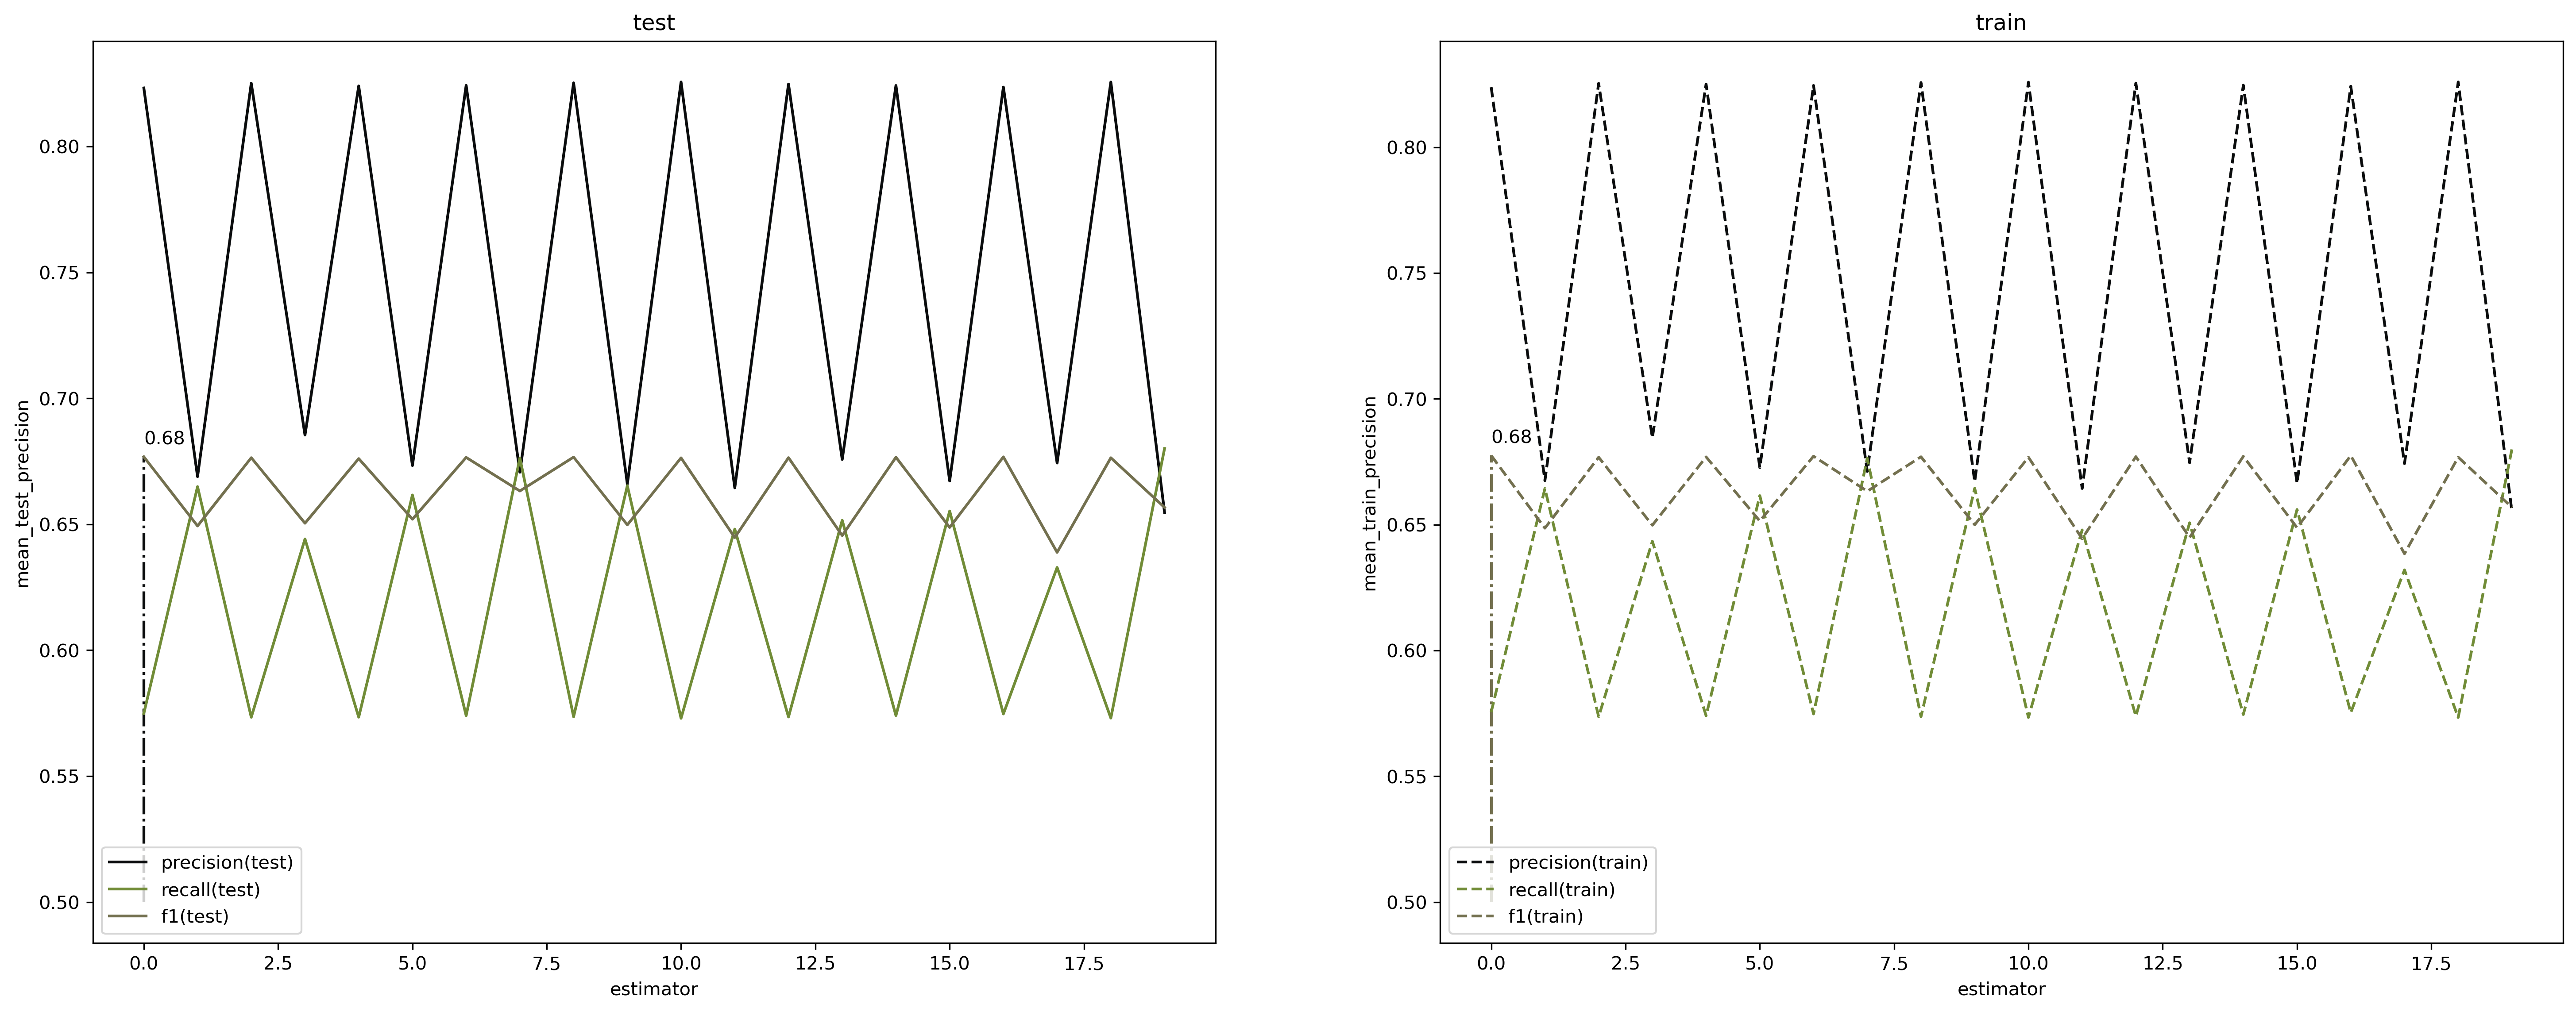

In [103]:
x_axis = list(range(0, 20))

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 9], dpi=300)

ax_0 = sns.lineplot(x=x_axis, y=test_precision['mean_test_precision'],
                    color='#0A0C0D', ax=axes[0], label='precision(test)')
ax_1 = sns.lineplot(x=x_axis, y=test_recall['mean_test_recall'],
                    color='#718C37', ax=axes[0], label='recall(test)')
ax_2 = sns.lineplot(x=x_axis, y=test_f1['mean_test_f1'],
                    color='#73704F', ax=axes[0], label='f1(test)')
ax_3 = sns.lineplot(x=x_axis, y=train_precision['mean_train_precision'],
                    color='#0A0C0D', ax=axes[1], label='precision(train)')
ax_4 = sns.lineplot(x=x_axis, y=train_recall['mean_train_recall'],
                    color='#718C37', ax=axes[1], label='recall(train)')
ax_5 = sns.lineplot(x=x_axis, y=train_f1['mean_train_f1'],
                    color='#73704F', ax=axes[1], label='f1(train)')

axes[0].vlines(x=x_axis[test_f1.index[test_f1['mean_test_f1'] == test_f1['mean_test_f1'].max()][0]],
               ymin=0.5, ymax=test_f1['mean_test_f1'].max(),
               linestyle='-.', color='#0A0C0D')
axes[1].vlines(x=x_axis[train_f1.index[train_f1['mean_train_f1'] == train_f1['mean_train_f1'].max()][0]],
               ymin=0.5, ymax=train_f1['mean_train_f1'].max(),
               linestyle='-.', color='#73704F')

ax_3.lines[0].set_linestyle("--")
ax_4.lines[1].set_linestyle("--")
ax_5.lines[2].set_linestyle("--")

axes[0].set_xlabel('estimator')
axes[0].annotate("%0.2f" % test_f1['mean_test_f1'].max(),
                 (x_axis[test_f1.index[test_f1['mean_test_f1'] == test_f1['mean_test_f1'].max()][0]],
                  test_f1['mean_test_f1'].max() + 0.005))
axes[0].set_title('test')
axes[1].set_xlabel('estimator')
axes[1].annotate("%0.2f" % train_f1['mean_train_f1'].max(),
                 (x_axis[train_f1.index[train_f1['mean_train_f1'] == train_f1['mean_train_f1'].max()][0]],
                  train_f1['mean_train_f1'].max() + 0.005))
axes[1].set_title('train')
plt.legend()
plt.savefig('../../demo/Fraud Detection/compare splits scores model_2.png')
plt.show()

### model three

In [9]:
model_3 = Pipeline(steps=[('selection', feature_pipeline),
                          ('poly', PolynomialFeatures()),
                          ('model', LogisticRegression(class_weight={0: 0, 1: 1.4736842105263157}, penalty='l2',
                                                       solver='saga'))])
model_3.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('poly', PolynomialFeatures()),
  ('model',
   LogisticRegression(class_weight={0: 0, 1: 1.4736842105263157}, solver='saga'))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'poly': PolynomialFeatures(),
 'model': LogisticRegression(class_weight={0: 0, 1: 1.4736842105263157}, solver='saga'),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection

In [8]:
grid_3 = {'poly__degree': [2, 3, 4, 5]}

model_3_gs = GridSearchCV(estimator=model_3, cv=cv, n_jobs=-1,
                          param_grid=grid_3,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_3_gs.fit(X, Y)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000001C0E0029D90>))])),
                                       ('poly', PolynomialFeatures()),
                                       ('model',
                                        LogisticRegression(class_weight={0: 0,
                                                                         1: 1.4736842105263157},
                                                           solver='saga'))]),
             n_jobs=-1, param_grid={'poly__degree': [2, 3, 4, 5]}, refit='f1',
             return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_sco

In [9]:
model_3_gs_cv = pd.DataFrame(model_3_gs.cv_results_)
model_3_gs_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,20.243378,1.296572,0.045399,0.009848,2,{'poly__degree': 2},0.577764,0.586905,0.577764,0.573882,...,0.734087,0.730879,0.735110,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.001240
1,36.746719,0.226800,0.071272,0.011003,3,{'poly__degree': 3},0.577764,0.586905,0.577764,0.573882,...,0.734087,0.730879,0.735110,0.733672,0.734351,0.734252,0.731585,0.733342,0.733432,0.001251
2,87.527245,0.501526,0.189896,0.024425,4,{'poly__degree': 4},0.577764,0.586905,0.577764,0.573882,...,0.734087,0.730879,0.735110,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.001240
3,231.261092,4.522659,0.447026,0.080511,5,{'poly__degree': 5},0.612047,0.600405,0.577764,0.588322,...,0.734062,0.723451,0.734962,0.733707,0.726884,0.726117,0.731807,0.733098,0.727313,0.008628


In [10]:
model_3_gs_cv.to_pickle('../../data/temp/model_3.pkl')

In [11]:
model_3_gs.best_score_, model_3_gs.best_estimator_

(0.7334280381149567,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000001C0E0029D90>))])),
                 ('poly', PolynomialFeatures()),
                 ('model',
                  LogisticRegression(class_weight={0: 0, 1: 1.4736842105263157},
                                     solver='saga'))]))

### model four

In [10]:
model_4 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', SVC(class_weight={0: 0, 1: 1.4736842105263157}))])
model_4.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', SVC(class_weight={0: 0, 1: 1.4736842105263157}))],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': SVC(class_weight={0: 0, 1: 1.4736842105263157}),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__C':

In [13]:
grid_4 = {'model__C': np.linspace(1, 10, 12),
          'model__degree': [3, 4, 5]}

model_4_gs = GridSearchCV(estimator=model_4, cv=cv, n_jobs=-1,
                          param_grid=grid_4,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True
                          )
model_4_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000001C0E0029D90>))])),
                                       ('model',
                                        SVC(class_weight={0: 0,
                                                          1: 1.4736842105263157}))]),
             n_jobs=-1,
             param_grid={'model__C': array([ 1.        ,  1.81818182,  2.63636364,  3.45454545,  4.27272727,
        5.09090909,  5.90909091,  6.72727273,  7.54545455,  8.36363636,
        9.18181818, 10.        ]),
                         'model__degree': [3, 4, 5]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
  

In [14]:
model_4_gs_cv = pd.DataFrame(model_4_gs.cv_results_)
model_4_gs_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__degree,params,split0_test_precision,split1_test_precision,split2_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,42.492191,0.930810,0.041495,0.007419,1.000000,3,"{'model__C': 1.0, 'model__degree': 3}",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
1,43.433133,0.478698,0.041495,0.009250,1.000000,4,"{'model__C': 1.0, 'model__degree': 4}",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
2,42.990854,0.371353,0.041983,0.007242,1.000000,5,"{'model__C': 1.0, 'model__degree': 5}",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
3,42.699494,0.753821,0.042960,0.006764,1.818182,3,"{'model__C': 1.8181818181818183, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
4,42.548427,1.089397,0.041495,0.008384,1.818182,4,"{'model__C': 1.8181818181818183, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
5,43.525415,1.487601,0.041497,0.011311,1.818182,5,"{'model__C': 1.8181818181818183, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
6,43.673092,0.788402,0.040031,0.008678,2.636364,3,"{'model__C': 2.6363636363636367, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
7,42.791194,0.659240,0.039543,0.008720,2.636364,4,"{'model__C': 2.6363636363636367, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
8,42.376492,0.681954,0.043936,0.010651,2.636364,5,"{'model__C': 2.6363636363636367, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124
9,41.863063,0.986847,0.041007,0.009365,3.454545,3,"{'model__C': 3.4545454545454546, 'model__degre...",0.577764,0.586905,0.577764,...,0.734087,0.730879,0.73511,0.733672,0.734351,0.734252,0.731807,0.733342,0.733438,0.00124


In [15]:
model_4_gs_cv.to_pickle('../../data/temp/model_4.pkl')

In [16]:
model_4_gs.best_score_, model_4_gs.best_estimator_

(0.7334280381149567,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000001C0E0029D90>))])),
                 ('model', SVC(class_weight={0: 0, 1: 1.4736842105263157}))]))

### model five

In [11]:
model_5 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', KNeighborsClassifier())])
model_5.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': KNeighborsClassifier(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model_

In [9]:
grid_5 = {'model__n_neighbors': list(range(5, 13, 2)),
          'model__leaf_size': [30, 45, 100, 250, 500]}

model_5_gs = GridSearchCV(estimator=model_5, cv=cv, n_jobs=-1,
                          param_grid=grid_5,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True)
model_5_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x000002212DF39D90>))])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__leaf_size': [30, 45, 100, 250, 500],
                         'model__n_neighbors': [5, 7, 9, 11]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [10]:
model_5_gs_cv = pd.DataFrame(model_5_gs.cv_results_)
model_5_gs_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__leaf_size,param_model__n_neighbors,params,split0_test_precision,split1_test_precision,split2_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,24.505334,4.018202,3.116283,1.122605,30,5,"{'model__leaf_size': 30, 'model__n_neighbors': 5}",0.720363,0.739038,0.724364,...,0.811385,0.819968,0.817105,0.827670,0.812873,0.819203,0.813778,0.815865,0.818964,0.007363
1,22.937959,3.597796,2.767414,0.859990,30,7,"{'model__leaf_size': 30, 'model__n_neighbors': 7}",0.731288,0.725782,0.723163,...,0.795995,0.792730,0.794281,0.805782,0.800754,0.795347,0.792234,0.797187,0.797043,0.005463
2,23.490075,4.061072,3.187726,0.962415,30,9,"{'model__leaf_size': 30, 'model__n_neighbors': 9}",0.738602,0.732779,0.727467,...,0.782845,0.794299,0.783649,0.782116,0.766360,0.786052,0.788063,0.788386,0.784258,0.005734
3,22.905739,3.935650,3.270715,0.948864,30,11,"{'model__leaf_size': 30, 'model__n_neighbors':...",0.739062,0.729795,0.728795,...,0.778573,0.776454,0.775333,0.790763,0.773783,0.763316,0.777598,0.766807,0.777303,0.006813
4,22.936173,3.909475,2.569061,0.903624,45,5,"{'model__leaf_size': 45, 'model__n_neighbors': 5}",0.725048,0.715171,0.728227,...,0.819373,0.816579,0.818133,0.820368,0.819516,0.824714,0.822488,0.810747,0.818573,0.005277
5,23.464691,3.912794,2.965121,0.923655,45,7,"{'model__leaf_size': 45, 'model__n_neighbors': 7}",0.738411,0.708877,0.739726,...,0.814149,0.795406,0.806892,0.805782,0.783460,0.796572,0.799442,0.795719,0.798611,0.007688
6,22.649939,3.987537,3.231662,0.985040,45,9,"{'model__leaf_size': 45, 'model__n_neighbors': 9}",0.733173,0.731347,0.725681,...,0.770067,0.792407,0.791023,0.794240,0.788299,0.782285,0.781807,0.791074,0.785335,0.005966
7,22.448327,4.280280,3.645626,0.961099,45,11,"{'model__leaf_size': 45, 'model__n_neighbors':...",0.730113,0.714411,0.745153,...,0.773971,0.781501,0.779056,0.771430,0.776805,0.772734,0.767677,0.773384,0.776297,0.006150
8,23.334350,4.136685,2.805004,1.174193,100,5,"{'model__leaf_size': 100, 'model__n_neighbors'...",0.735699,0.734270,0.710203,...,0.818753,0.817034,0.816982,0.822768,0.802669,0.815633,0.800357,0.806377,0.814328,0.009045
9,23.424171,4.400454,3.612431,1.219584,100,7,"{'model__leaf_size': 100, 'model__n_neighbors'...",0.731876,0.710932,0.724573,...,0.780977,0.800344,0.796649,0.792948,0.801391,0.794472,0.795192,0.799800,0.795035,0.006209


In [11]:
model_5_gs_cv.to_pickle('../../data/temp/model_5.pkl')

In [12]:
model_5_gs.best_score_, model_5_gs.best_estimator_

(0.729442199230999,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x000002212DF39D90>))])),
                 ('model', KNeighborsClassifier())]))

### model six

In [12]:
model_6 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', DecisionTreeClassifier())])
model_6.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', DecisionTreeClassifier())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': DecisionTreeClassifier(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 '

In [14]:
grid_6 = {'model__max_depth': [12, 18, 24, 32],
          'model__min_samples_split': [30, 40, 50, 100],
          'model__min_samples_leaf': [25, 45, 65]}

model_6_gs = GridSearchCV(estimator=model_6, cv=cv, n_jobs=-1,
                          param_grid=grid_6,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True)
model_6_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [12, 18, 24, 32],
                         'model__min_samples_leaf': [25, 45, 65],
                         'model__min_samples_split': [30, 40, 50, 100]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [15]:
model_6_gs_cv = pd.DataFrame(model_6_gs.cv_results_)
model_6_gs_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_precision,split1_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,22.824216,4.293556,0.046863,0.018728,12,25,30,"{'model__max_depth': 12, 'model__min_samples_l...",0.882241,0.883448,...,0.833994,0.808883,0.831914,0.823288,0.831128,0.817174,0.855585,0.833802,0.833146,0.015347
1,22.782232,3.800916,0.043936,0.017655,12,25,40,"{'model__max_depth': 12, 'model__min_samples_l...",0.882660,0.884598,...,0.833751,0.808441,0.838091,0.822188,0.831140,0.817174,0.855585,0.833802,0.833291,0.015431
2,22.636759,3.860258,0.047841,0.019107,12,25,50,"{'model__max_depth': 12, 'model__min_samples_l...",0.884020,0.883651,...,0.833680,0.808441,0.831914,0.822238,0.830933,0.817174,0.855585,0.833802,0.833071,0.015402
3,22.506419,3.543702,0.046865,0.019132,12,25,100,"{'model__max_depth': 12, 'model__min_samples_l...",0.866038,0.872711,...,0.826403,0.794667,0.823088,0.811806,0.818763,0.808269,0.841069,0.823600,0.822376,0.015233
4,23.002885,3.271788,0.049793,0.018906,12,45,30,"{'model__max_depth': 12, 'model__min_samples_l...",0.862267,0.873540,...,0.820978,0.790974,0.827842,0.807309,0.828526,0.803279,0.829492,0.834042,0.821073,0.016280
5,22.367291,3.771926,0.045401,0.021518,12,45,40,"{'model__max_depth': 12, 'model__min_samples_l...",0.862267,0.874713,...,0.820978,0.790696,0.827881,0.806918,0.828526,0.803279,0.829492,0.833869,0.821113,0.016213
6,22.590158,3.904334,0.043447,0.016904,12,45,50,"{'model__max_depth': 12, 'model__min_samples_l...",0.860509,0.875835,...,0.820978,0.790893,0.827839,0.807309,0.828526,0.803279,0.829626,0.834042,0.821008,0.016365
7,22.426847,3.799127,0.042472,0.017567,12,45,100,"{'model__max_depth': 12, 'model__min_samples_l...",0.862981,0.876703,...,0.819359,0.787834,0.827266,0.806759,0.827176,0.802059,0.829159,0.832331,0.820028,0.016345
8,22.503002,3.529122,0.041007,0.021656,12,65,30,"{'model__max_depth': 12, 'model__min_samples_l...",0.871072,0.856945,...,0.816400,0.809913,0.830847,0.807055,0.827835,0.788422,0.824742,0.831279,0.816265,0.013093
9,22.814939,3.710902,0.035637,0.011206,12,65,40,"{'model__max_depth': 12, 'model__min_samples_l...",0.872372,0.857044,...,0.816400,0.809913,0.831422,0.807055,0.827783,0.788422,0.824729,0.831279,0.816274,0.013009


In [16]:
model_6_gs_cv.to_pickle('../../data/temp/model_6.pkl')

In [17]:
model_6_gs.best_score_, model_6_gs.best_estimator_

(0.9061267035868111,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
                 ('model',
                  DecisionTreeClassifier(max_depth=32, min_samples_leaf=25,
                                         min_samples_split=50))]))

### model seven

In [20]:
model_7 = Pipeline(steps=[('selection', feature_pipeline),
                          ('model', ExtraTreeClassifier())])
model_7.get_params()

{'memory': None,
 'steps': [('selection', Pipeline(steps=[('feat_selection',
                    SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
  ('model', ExtraTreeClassifier())],
 'verbose': False,
 'selection': Pipeline(steps=[('feat_selection',
                  SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))]),
 'model': ExtraTreeClassifier(),
 'selection__memory': None,
 'selection__steps': [('feat_selection',
   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))],
 'selection__verbose': False,
 'selection__feat_selection': SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>),
 'selection__feat_selection__k': 10,
 'selection__feat_selection__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model_

In [21]:
grid_7 = {'model__ccp_alpha': np.linspace(0, 1, 8),
          'model__max_depth': [24, 32, 36],
          'model__min_samples_split': [50, 100, 120],
          'model__min_samples_leaf': [20, 25]}

model_7_gs = GridSearchCV(estimator=model_7, cv=cv, n_jobs=-1,
                          param_grid=grid_7,
                          scoring={'precision': make_scorer(precision_score),
                                   'recall': make_scorer(recall_score),
                                   'f1': make_scorer(f1_score)},
                          refit='f1',
                          return_train_score=True)
model_7_gs.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=8, n_splits=4, random_state=1),
             estimator=Pipeline(steps=[('selection',
                                        Pipeline(steps=[('feat_selection',
                                                         SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
                                       ('model', ExtraTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ]),
                         'model__max_depth': [24, 32, 36],
                         'model__min_samples_leaf': [20, 25],
                         'model__min_samples_split': [50, 100, 120]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(reca

In [22]:
model_7_gs_cv = pd.DataFrame(model_7_gs.cv_results_)
model_7_gs_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__ccp_alpha,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_precision,...,split24_train_f1,split25_train_f1,split26_train_f1,split27_train_f1,split28_train_f1,split29_train_f1,split30_train_f1,split31_train_f1,mean_train_f1,std_train_f1
0,15.151625,1.761997,0.034659,0.026120,0.0,24,20,50,"{'model__ccp_alpha': 0.0, 'model__max_depth': ...",0.775910,...,0.713627,0.725147,0.726647,0.718803,0.713247,0.728694,0.735415,0.722336,0.721057,0.011850
1,16.235350,0.257656,0.034960,0.006516,0.0,24,20,100,"{'model__ccp_alpha': 0.0, 'model__max_depth': ...",0.757220,...,0.709487,0.728716,0.720075,0.728174,0.723524,0.701474,0.733845,0.693212,0.715449,0.012094
2,16.255450,0.209759,0.034661,0.009357,0.0,24,20,120,"{'model__ccp_alpha': 0.0, 'model__max_depth': ...",0.774400,...,0.712308,0.714919,0.720862,0.709497,0.722487,0.717481,0.729643,0.729367,0.719647,0.009820
3,16.398482,0.227114,0.033195,0.006476,0.0,24,25,50,"{'model__ccp_alpha': 0.0, 'model__max_depth': ...",0.751078,...,0.726622,0.732894,0.690675,0.704882,0.721719,0.724515,0.716950,0.723466,0.717103,0.014821
4,16.462432,0.227856,0.033196,0.006476,0.0,24,25,100,"{'model__ccp_alpha': 0.0, 'model__max_depth': ...",0.772947,...,0.733550,0.720973,0.697457,0.704951,0.720861,0.728964,0.696982,0.677092,0.713086,0.014797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,16.138721,0.336400,0.028802,0.005672,1.0,36,20,100,"{'model__ccp_alpha': 1.0, 'model__max_depth': ...",0.574429,...,0.733031,0.733559,0.733064,0.733507,0.731972,0.733757,0.732899,0.734530,0.733290,0.000995
140,15.485799,0.848265,0.027826,0.006458,1.0,36,20,120,"{'model__ccp_alpha': 1.0, 'model__max_depth': ...",0.574429,...,0.733031,0.733559,0.733064,0.733507,0.731972,0.733757,0.732899,0.734530,0.733290,0.000995
141,16.201674,0.721876,0.029778,0.005998,1.0,36,25,50,"{'model__ccp_alpha': 1.0, 'model__max_depth': ...",0.574429,...,0.733031,0.733559,0.733064,0.733507,0.731972,0.733757,0.732899,0.734530,0.733290,0.000995
142,16.073288,0.174328,0.030266,0.005436,1.0,36,25,100,"{'model__ccp_alpha': 1.0, 'model__max_depth': ...",0.574429,...,0.733031,0.733559,0.733064,0.733507,0.731972,0.733757,0.732899,0.734530,0.733290,0.000995


In [23]:
model_7_gs_cv.to_pickle('../../data/temp/model_7.pkl')

In [24]:
model_7_gs.best_score_, model_7_gs.best_estimator_

(0.7332832616479414,
 Pipeline(steps=[('selection',
                  Pipeline(steps=[('feat_selection',
                                   SelectKBest(score_func=<function mutual_info_classif at 0x0000026E1CF99D90>))])),
                 ('model',
                  ExtraTreeClassifier(ccp_alpha=0.14285714285714285,
                                      max_depth=24, min_samples_leaf=20,
                                      min_samples_split=50))]))